### Paulan, Renz Aaron C.
### BCS32

## PREPROCESSING

In [1]:
import pandas as pd
df = pd.read_csv(r"D:\github\education\machine_learning\student+performance\student\student-mat.csv", sep=",")
df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [2]:
attendance_days = 93
df.loc[:, 'attendance'] = (attendance_days - df['absences']) / 100
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,attendance
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0.87
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0.89
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0.83
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,0.91
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,0.82
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,0.90
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,0.90
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,0.93


In [3]:
selected_df = df[['studytime', 'attendance', 'G1', 'G2', 'famsup', 'G3']]
selected_df

,studytime,attendance,G1,G2,famsup,G3
0,2,0.87,5,6,no,6
1,2,0.89,5,5,yes,6
2,2,0.83,7,8,no,10
3,3,0.91,15,14,yes,15
4,2,0.89,6,10,yes,10
...,...,...,...,...,...,...
390,2,0.82,9,9,yes,9
391,1,0.90,14,16,no,16
392,1,0.90,10,8,no,7
393,1,0.93,11,12,no,10


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
selected_df.loc[:, 'famsup'] = label_encoder.fit_transform(selected_df['famsup'])
selected_df

,studytime,attendance,G1,G2,famsup,G3
0,2,0.87,5,6,0,6
1,2,0.89,5,5,1,6
2,2,0.83,7,8,0,10
3,3,0.91,15,14,1,15
4,2,0.89,6,10,1,10
...,...,...,...,...,...,...
390,2,0.82,9,9,1,9
391,1,0.90,14,16,0,16
392,1,0.90,10,8,0,7
393,1,0.93,11,12,0,10


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = selected_df.drop('G3', axis=1)
y = selected_df['G3']

# 80/20 
x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(x, y, test_size=0.20, random_state=0)

# 70/30 
x_train_70, x_test_30, y_train_70, y_test_30 = train_test_split(x, y, test_size=0.30, random_state=0)

# 60/40 
x_train_60, x_test_40, y_train_60, y_test_40 = train_test_split(x, y, test_size=0.40, random_state=0)

# Apply feature scaling to the data
scaler = StandardScaler()
x_train_80 = scaler.fit_transform(x_train_80)
x_test_20 = scaler.transform(x_test_20)

x_train_70 = scaler.fit_transform(x_train_70)
x_test_30 = scaler.transform(x_test_30)

x_train_60 = scaler.fit_transform(x_train_60)
x_test_40 = scaler.transform(x_test_40)


print(f"x_train_80 shape: {x_train_80.shape}, x_test_20 shape: {x_test_20.shape}")
print(f"x_train_70 shape: {x_train_70.shape}, x_test_30 shape: {x_test_30.shape}")
print(f"x_train_60 shape: {x_train_60.shape}, x_test_40 shape: {x_test_40.shape}")


x_train_80 shape: (316, 5), x_test_20 shape: (79, 5)
x_train_70 shape: (276, 5), x_test_30 shape: (119, 5)
x_train_60 shape: (237, 5), x_test_40 shape: (158, 5)


### K-NEAREST NEIGHBORS (KNN)

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has 

Optimal k for 80/20 split: 7
Optimal k for 70/30 split: 18
Optimal k for 60/40 split: 5


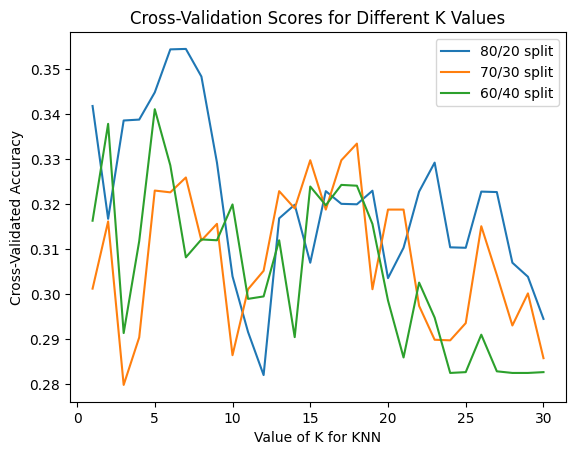

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

k_range = range(1, 31)
k_scores_80 = []
k_scores_70 = []
k_scores_60 = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Cross-validation for 80/20 split
    scores_80 = cross_val_score(knn, x_train_80, y_train_80, cv=10, scoring='accuracy')
    k_scores_80.append(scores_80.mean())
    
    # Cross-validation for 70/30 split
    scores_70 = cross_val_score(knn, x_train_70, y_train_70, cv=10, scoring='accuracy')
    k_scores_70.append(scores_70.mean())
    
    # Cross-validation for 60/40 split
    scores_60 = cross_val_score(knn, x_train_60, y_train_60, cv=10, scoring='accuracy')
    k_scores_60.append(scores_60.mean())

# Find the optimal k values for each split
optimal_k_80 = k_range[np.argmax(k_scores_80)]
optimal_k_70 = k_range[np.argmax(k_scores_70)]
optimal_k_60 = k_range[np.argmax(k_scores_60)]

print(f"Optimal k for 80/20 split: {optimal_k_80}")
print(f"Optimal k for 70/30 split: {optimal_k_70}")
print(f"Optimal k for 60/40 split: {optimal_k_60}")

# Plot the cross-validation scores for all the splut
plt.plot(k_range, k_scores_80, label='80/20 split')
plt.plot(k_range, k_scores_70, label='70/30 split')
plt.plot(k_range, k_scores_60, label='60/40 split')

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation Scores for Different K Values')
plt.legend()

plt.show()


In [7]:
# Initialize the KNN regressor with the optimal k value for the 80/20 split
knn_80 = KNeighborsClassifier(n_neighbors=optimal_k_80)
knn_70 = KNeighborsClassifier(n_neighbors=optimal_k_70)
knn_60 = KNeighborsClassifier(n_neighbors=optimal_k_60)

knn_80.fit(x_train_80, y_train_80)
knn_70.fit(x_train_70, y_train_70)
knn_60.fit(x_train_60, y_train_60)


KNeighborsClassifier()

In [8]:
knn_80

KNeighborsClassifier(n_neighbors=7)

In [9]:
knn_70

KNeighborsClassifier(n_neighbors=18)

In [10]:
knn_60

KNeighborsClassifier()

In [11]:
y_pred_80 = knn_80.predict(x_test_20)
y_pred_70 = knn_70.predict(x_test_30)
y_pred_60 = knn_60.predict(x_test_40)

In [12]:
print("Predictions for 80/20 split:\n", y_pred_80)

Predictions for 80/20 split:
 [14  9 10 16 15 14 13 11 10 16  0  8 11 10 15 15 10  8  9 15  0  8  8 15
 14 14 10 18  0 12  0  8  8  5 13 11 10 13 10 11  5 17  9  8 10  0 13  8
 14  0 11 15 10  0 12  9  9 13 12 12 11 11 12 16 11 14 18 11  6 10 10 12
  6  0  8 10  9 15  0]


In [13]:
print("Predictions for 70/30 split:\n", y_pred_70)

Predictions for 70/30 split:
 [14 10 10 15 13 14 13 11 10 15 10  8 11  8 11 12 10 10  9 11 10 10  8 13
 14 15 10 15  0 12  0 10  8  8 12 11 10 13 10 11  6 15  8 10  8  0 11 10
 10 10 11 15 10 10 13 10 11 13 13 13 11 13 13 15 11 13 16 11  6 10 10 11
  8 10  8 10 11 15 10 10 10 10 10 11 11 11 10 13 16 10 10  0 10 15 10 10
 15 11 11 11 11 13 10 10  8 11 13  0 10 10 10 10 15 10  0  6 10  0 10]


In [14]:
print("Predictions for 60/40 split:\n", y_pred_60)

Predictions for 60/40 split:
 [14 11  7 14 16 14 13 11  8 12  0  8 11 10 15 12 10  8  9 15  0  8  8 15
 13 15 10 15  0 12  0 11  8  5 13 11 14 13 10 11  6 15  9 11 10  0 13  8
 12  6 10 15 14  0 12  9  9 13 13 12 11 11 12 15 10 11 15 11  6  8  8 12
 10  0  8  8  8 15  0 10 10  0  8 11 11 11 10 14 16 10 10  0 10 15  0  8
 15 12 13 11  8 11  0 10  8 11 15  0  9  0  0 10 15  6  5  0 10  0 10 15
 11 13 11  0 10 16 13 15 11 14 15  8 12 14 10  8 10 11 10 13  8 11  8 10
 13  9 15 11 10 11  0 15  0 11 12  8 10  0]


In [15]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix

# Round the predictions to the nearest integer
y_pred_80_rounded = np.round(y_pred_80)
y_pred_70_rounded = np.round(y_pred_70)
y_pred_60_rounded = np.round(y_pred_60)

# Calculate the accuracy score for each split
accuracy_80 = accuracy_score(y_test_20, y_pred_80_rounded)
accuracy_70 = accuracy_score(y_test_30, y_pred_70_rounded)
accuracy_60 = accuracy_score(y_test_40, y_pred_60_rounded)

# Calculate the confusion matrix for each split
conf_matrix_80 = confusion_matrix(y_test_20, y_pred_80_rounded)
conf_matrix_70 = confusion_matrix(y_test_30, y_pred_70_rounded)
conf_matrix_60 = confusion_matrix(y_test_40, y_pred_60_rounded)

precision_80 = precision_score(y_test_20, y_pred_80_rounded, average='macro', zero_division=1)
recall_80 = recall_score(y_test_20, y_pred_80_rounded, average='macro', zero_division=1)
f1_80 = f1_score(y_test_20, y_pred_80_rounded, average='macro', zero_division=1)

precision_70 = precision_score(y_test_30, y_pred_70_rounded, average='macro', zero_division=1)
recall_70 = recall_score(y_test_30, y_pred_70_rounded, average='macro', zero_division=1)
f1_70 = f1_score(y_test_30, y_pred_70_rounded, average='macro', zero_division=1)

precision_60 = precision_score(y_test_40, y_pred_60_rounded, average='macro', zero_division=1)
recall_60 = recall_score(y_test_40, y_pred_60_rounded, average='macro', zero_division=1)
f1_60 = f1_score(y_test_40, y_pred_60_rounded, average='macro', zero_division=1)

print(f"80/20 split")
print(f"Accuracy:   {accuracy_80}")
print(f"Precision:  {precision_80}")
print(f"Recall:     {recall_80}")
print(f"F1:         {f1_80}")
print(f"Confusion Matrix for 80/20 split:\n{conf_matrix_80}")

print(f"\n70/30 split")
print(f"Accuracy:   {accuracy_70}")
print(f"Precision:  {precision_70}")
print(f"Recall:     {recall_70}")
print(f"F1:         {f1_70}")
print(f"\nConfusion Matrix for 70/30 split:\n{conf_matrix_70}")

print(f"\n60/40 split")
print(f"Accuracy:   {accuracy_60}")
print(f"Precision:  {precision_60}")
print(f"Recall:     {recall_60}")
print(f"F1:         {f1_60}")
print(f"\nConfusion Matrix for 60/40 split:\n{conf_matrix_60}")

80/20 split
Accuracy:   0.25316455696202533
Precision:  0.3508870214752568
Recall:     0.22844410491469314
F1:         0.16927386339151046
Confusion Matrix for 80/20 split:
[[6 0 0 0 0 3 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 1 3 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 3 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 2 2 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 2 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 3 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 3 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 2 0 2 1 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]]

70/30 split
Accuracy:   0.3025210084033613
Precision:  0.528577091513138
Recall:     0.20799655388471178
F1:         0.18742545528654592

Confusion Matrix for 70/30 split:
[[ 7  0  0  0  0  0  0 1

80/20 split

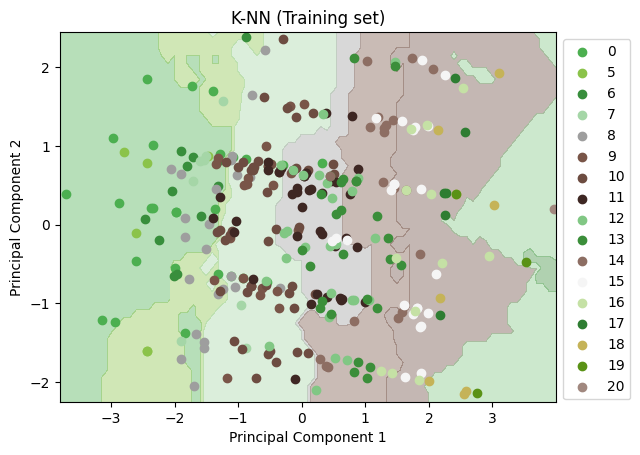

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2)
X_train_pca_80 = pca.fit_transform(x_train_80)


X1_min_20, X1_max_20 = X_train_pca_80[:, 0].min() - 0.1, X_train_pca_80[:, 0].max() + 0.1
X2_min_20, X2_max_20 = X_train_pca_80[:, 1].min() - 0.1, X_train_pca_80[:, 1].max() + 0.1
X1_20, X2_20 = np.meshgrid(np.arange(X1_min_20, X1_max_20, 0.1),
                     np.arange(X2_min_20, X2_max_20, 0.1))

grid_points = np.c_[X1_20.ravel(), X2_20.ravel()]
grid_points_original = pca.inverse_transform(grid_points)


Z = knn_80.predict(grid_points_original)


le = LabelEncoder()
Z = le.fit_transform(Z.ravel())  
Z = Z.reshape(X1_20.shape)          

# Plot decision boundary
plt.contourf(X1_20, X2_20, Z, alpha=0.40, cmap=ListedColormap(('#4CAF50', '#8BC34A', '#388E3C', '#A5D6A7', '#9E9E9E', '#795548', '#6D4C41', '#3E2723', '#81C784', '#3B8E3A')))

plt.xlim(X1_20.min(), X1_20.max())
plt.ylim(X2_20.min(), X2_20.max())


for i, j in enumerate(np.unique(y_train_80)):
    plt.scatter(X_train_pca_80[y_train_80 == j, 0], X_train_pca_80[y_train_80 == j, 1], 
                color=ListedColormap(('#4CAF50', '#8BC34A', '#388E3C', '#A5D6A7', '#9E9E9E', '#795548', '#6D4C41', '#3E2723', '#81C784', '#3B8E3A', '#8D6E63', '#F5F5F5', '#C5E1A5', '#2E7D32', '#C5B358', '#5A9216', '#A1887F',))(i), label=j)

plt.title('K-NN (Training set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

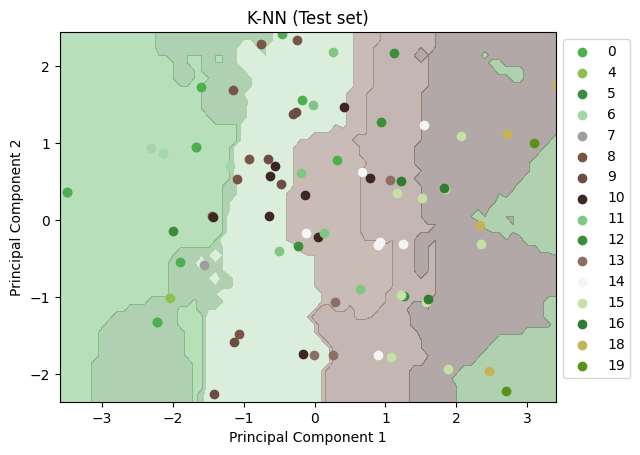

In [17]:
# Apply PCA to the test set
X_test_pca_80 = pca.transform(x_test_20)

# Plot the decision boundary for the test set
X1_min_test_20, X1_max_test_20 = X_test_pca_80[:, 0].min() - 0.1, X_test_pca_80[:, 0].max() + 0.1
X2_min_test_20, X2_max_test_20 = X_test_pca_80[:, 1].min() - 0.1, X_test_pca_80[:, 1].max() + 0.1
X1_test_20, X2_test_20 = np.meshgrid(np.arange(X1_min_test_20, X1_max_test_20, 0.1),
                                     np.arange(X2_min_test_20, X2_max_test_20, 0.1))

# Combine X1 and X2 to create grid points and apply PCA.inverse_transform to match original feature space
grid_points_test = np.c_[X1_test_20.ravel(), X2_test_20.ravel()]
grid_points_original_test = pca.inverse_transform(grid_points_test)

# Predict using the classifier on the grid points in the original feature space
Z_test = knn_80.predict(grid_points_original_test)

# Convert string labels to numerical values for contour plotting
Z_test = le.fit_transform(Z_test.ravel())  # convert string labels to numbers (apply before reshaping)
Z_test = Z_test.reshape(X1_test_20.shape)  # reshape after encoding

# Plot decision boundary
plt.contourf(X1_test_20, X2_test_20, Z_test, alpha=0.40, cmap=ListedColormap(('#4CAF50', '#8BC34A', '#388E3C', '#A5D6A7', '#9E9E9E', '#795548', '#6D4C41', '#3E2723', '#81C784', '#3B8E3A')))

plt.xlim(X1_test_20.min(), X1_test_20.max())
plt.ylim(X2_test_20.min(), X2_test_20.max())

# Scatter plot of the PCA-transformed test set points
for i, j in enumerate(np.unique(y_test_20)):
    plt.scatter(X_test_pca_80[y_test_20 == j, 0], X_test_pca_80[y_test_20 == j, 1], 
                color=ListedColormap(('#4CAF50', '#8BC34A', '#388E3C', '#A5D6A7', '#9E9E9E', '#795548', '#6D4C41', '#3E2723', '#81C784', '#3B8E3A', '#8D6E63', '#F5F5F5', '#C5E1A5', '#2E7D32', '#C5B358', '#5A9216', '#A1887F',))(i), label=j)

plt.title('K-NN (Test set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

70/30 split

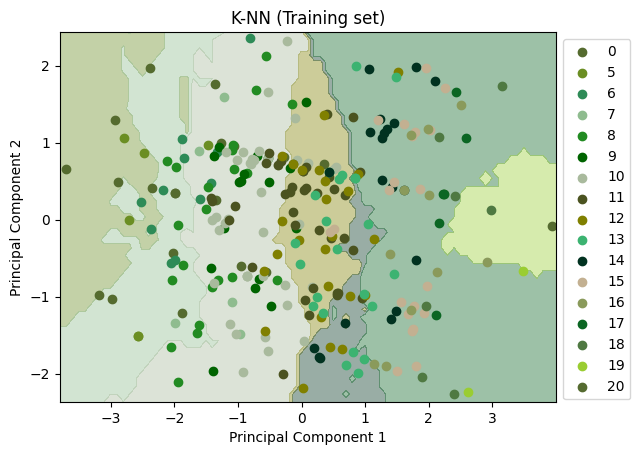

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

# Apply PCA to the training set
pca = PCA(n_components=2)
X_train_pca_70 = pca.fit_transform(x_train_70)

# Creating a mesh grid for plotting
X1_min_30, X1_max_30 = X_train_pca_70[:, 0].min() - 0.1, X_train_pca_70[:, 0].max() + 0.1
X2_min_30, X2_max_30 = X_train_pca_70[:, 1].min() - 0.1, X_train_pca_70[:, 1].max() + 0.1
X1_30, X2_30 = np.meshgrid(np.arange(X1_min_30, X1_max_30, 0.1),
                     np.arange(X2_min_30, X2_max_30, 0.1))


grid_points = np.c_[X1_30.ravel(), X2_30.ravel()]
grid_points_original = pca.inverse_transform(grid_points)


Z = knn_70.predict(grid_points_original)


le = LabelEncoder()
Z = le.fit_transform(Z.ravel())
Z = Z.reshape(X1_30.shape)          

# Plot decision boundary
plt.contourf(X1_30, X2_30, Z, alpha=0.40, cmap=ListedColormap(('#556B2F', '#6B8E23', '#2E8B57', '#8FBC8F', '#228B22', '#006400', '#A9BA9D', '#4B5320', '#808000', '#3CB371', '#013220', '#C3B091', '#8A9A5B', '#0B6623', '#4F7942', '#9ACD32', '#556B30')))

plt.xlim(X1_30.min(), X1_30.max())
plt.ylim(X2_30.min(), X2_30.max())

# Scatter plot of the PCA-transformed training set points
for i, j in enumerate(np.unique(y_train_70)):
    plt.scatter(X_train_pca_70[y_train_70 == j, 0], X_train_pca_70[y_train_70 == j, 1], 
                color=ListedColormap(('#556B2F', '#6B8E23', '#2E8B57', '#8FBC8F', '#228B22', '#006400', '#A9BA9D', '#4B5320', '#808000', '#3CB371', '#013220', '#C3B091', '#8A9A5B', '#0B6623', '#4F7942', '#9ACD32', '#556B30'))(i), label=j)

plt.title('K-NN (Training set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

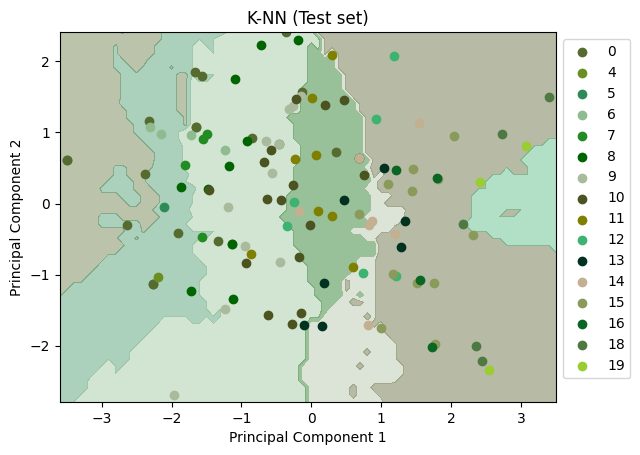

In [19]:
# Apply PCA to the test set
X_test_pca_70 = pca.transform(x_test_30)

# Plot the decision boundary for the test set
X1_min_test_30, X1_max_test_30 = X_test_pca_70[:, 0].min() - 0.1, X_test_pca_70[:, 0].max() + 0.1
X2_min_test_30, X2_max_test_30 = X_test_pca_70[:, 1].min() - 0.1, X_test_pca_70[:, 1].max() + 0.1
X1_test_30, X2_test_30 = np.meshgrid(np.arange(X1_min_test_30, X1_max_test_30, 0.1),
                                     np.arange(X2_min_test_30, X2_max_test_30, 0.1))

# Combine X1 and X2 to create grid points and apply PCA.inverse_transform to match original feature space
grid_points_test = np.c_[X1_test_30.ravel(), X2_test_30.ravel()]
grid_points_original_test = pca.inverse_transform(grid_points_test)

# Predict using the classifier on the grid points in the original feature space
Z_test = knn_70.predict(grid_points_original_test)

# Convert string labels to numerical values for contour plotting
Z_test = le.fit_transform(Z_test.ravel())  # convert string labels to numbers (apply before reshaping)
Z_test = Z_test.reshape(X1_test_30.shape)  # reshape after encoding

# Plot decision boundary
plt.contourf(X1_test_30, X2_test_30, Z_test, alpha=0.40, cmap=ListedColormap(('#556B2F', '#6B8E23', '#2E8B57', '#8FBC8F', '#228B22', '#006400', '#A9BA9D', '#4B5320', '#808000', '#3CB371')))

plt.xlim(X1_test_30.min(), X1_test_30.max())
plt.ylim(X2_test_30.min(), X2_test_30.max())

# Scatter plot of the PCA-transformed test set points
for i, j in enumerate(np.unique(y_test_30)):
    plt.scatter(X_test_pca_70[y_test_30 == j, 0], X_test_pca_70[y_test_30 == j, 1], 
                color=ListedColormap(('#556B2F', '#6B8E23', '#2E8B57', '#8FBC8F', '#228B22', '#006400', '#A9BA9D', '#4B5320', '#808000', '#3CB371', '#013220', '#C3B091', '#8A9A5B', '#0B6623', '#4F7942', '#9ACD32', '#556B30'))(i), label=j)

plt.title('K-NN (Test set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

60/40 split

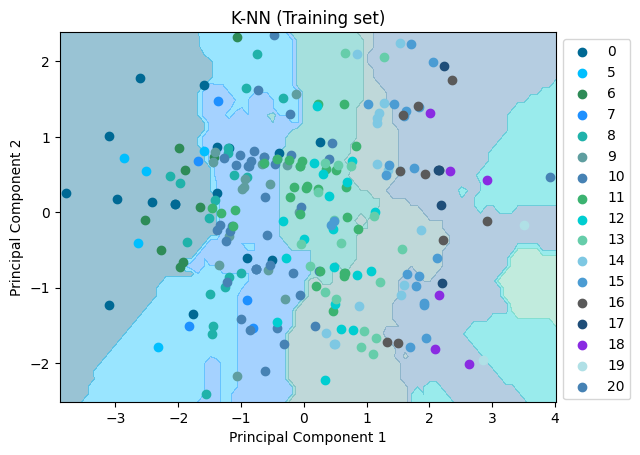

In [20]:
# Apply PCA to the training set
pca = PCA(n_components=2)
X_train_pca_60 = pca.fit_transform(x_train_60)

# Creating a mesh grid for plotting
X1_min_60, X1_max_60 = X_train_pca_60[:, 0].min() - 0.1, X_train_pca_60[:, 0].max() + 0.1
X2_min_60, X2_max_60 = X_train_pca_60[:, 1].min() - 0.1, X_train_pca_60[:, 1].max() + 0.1
X1_60, X2_60 = np.meshgrid(np.arange(X1_min_60, X1_max_60, 0.1),
                           np.arange(X2_min_60, X2_max_60, 0.1))

# Combine X1 and X2 to create grid points and apply PCA.inverse_transform to match original feature space
grid_points = np.c_[X1_60.ravel(), X2_60.ravel()]
grid_points_original = pca.inverse_transform(grid_points)

# Predict using the classifier on the grid points in the original feature space
Z = knn_60.predict(grid_points_original)

# Convert string labels to numerical values for contour plotting
le = LabelEncoder()
Z = le.fit_transform(Z.ravel())  # convert string labels to numbers (apply before reshaping)
Z = Z.reshape(X1_60.shape)       # reshape after encoding

# Plot decision boundary
plt.contourf(X1_60, X2_60, Z, alpha=0.40, cmap=ListedColormap(('#006994', '#00BFFF', '#2E8B57', '#1E90FF', '#20B2AA', '#5F9EA0', '#4682B4', '#3CB371', '#00CED1', '#66CDAA')))

plt.xlim(X1_60.min(), X1_60.max())
plt.ylim(X2_60.min(), X2_60.max())

# Scatter plot of the PCA-transformed training set points
for i, j in enumerate(np.unique(y_train_60)):
    plt.scatter(X_train_pca_60[y_train_60 == j, 0], X_train_pca_60[y_train_60 == j, 1], 
                color=ListedColormap(('#006994', '#00BFFF', '#2E8B57', '#1E90FF', '#20B2AA', '#5F9EA0', '#4682B4', '#3CB371', '#00CED1', '#66CDAA', '#7EC8E3', '#4B9CD3', '#5A5A5A', '#1F4E79', '#8A2BE2', '#B0E0E6', '#4682B4'))(i), label=j)

plt.title('K-NN (Training set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

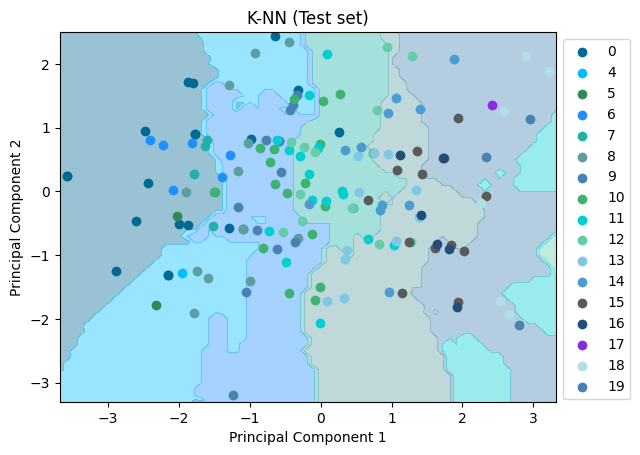

In [21]:
# Apply PCA to the test set
X_test_pca_60 = pca.transform(x_test_40)

# Plot the decision boundary for the test set
X1_min_test_60, X1_max_test_60 = X_test_pca_60[:, 0].min() - 0.1, X_test_pca_60[:, 0].max() + 0.1
X2_min_test_60, X2_max_test_60 = X_test_pca_60[:, 1].min() - 0.1, X_test_pca_60[:, 1].max() + 0.1
X1_test_60, X2_test_60 = np.meshgrid(np.arange(X1_min_test_60, X1_max_test_60, 0.1),
                                     np.arange(X2_min_test_60, X2_max_test_60, 0.1))

# Combine X1 and X2 to create grid points and apply PCA.inverse_transform to match original feature space
grid_points_test = np.c_[X1_test_60.ravel(), X2_test_60.ravel()]
grid_points_original_test = pca.inverse_transform(grid_points_test)

# Predict using the classifier on the grid points in the original feature space
Z_test = knn_60.predict(grid_points_original_test)

# Convert string labels to numerical values for contour plotting
Z_test = le.fit_transform(Z_test.ravel())  # convert string labels to numbers (apply before reshaping)
Z_test = Z_test.reshape(X1_test_60.shape)  # reshape after encoding

# Plot decision boundary
plt.contourf(X1_test_60, X2_test_60, Z_test, alpha=0.40, cmap=ListedColormap(('#006994', '#00BFFF', '#2E8B57', '#1E90FF', '#20B2AA', '#5F9EA0', '#4682B4', '#3CB371', '#00CED1', '#66CDAA')))

plt.xlim(X1_test_60.min(), X1_test_60.max())
plt.ylim(X2_test_60.min(), X2_test_60.max())

# Scatter plot of the PCA-transformed test set points
for i, j in enumerate(np.unique(y_test_40)):
    plt.scatter(X_test_pca_60[y_test_40 == j, 0], X_test_pca_60[y_test_40 == j, 1], 
                color=ListedColormap(('#006994', '#00BFFF', '#2E8B57', '#1E90FF', '#20B2AA', '#5F9EA0', '#4682B4', '#3CB371', '#00CED1', '#66CDAA', '#7EC8E3', '#4B9CD3', '#5A5A5A', '#1F4E79', '#8A2BE2', '#B0E0E6', '#4682B4'))(i), label=j)

plt.title('K-NN (Test set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### LINEAR REGRESSION

In [22]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import mean_squared_error, r2_score



# Initialize the FactorAnalysis model
fa = FactorAnalysis(n_components=1)
x_set_80 = fa.fit_transform(x_train_80)

lr = LinearRegression()
lr.fit(x_set_80, y_train_80)

y2_pred = lr.predict 





In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [24]:
# Initialize the Linear Regression model
lr_80 = LinearRegression()
lr_70 = LinearRegression()
lr_60 = LinearRegression()

# Fit the model on each training set
lr_80.fit(x_train_80, y_train_80)
lr_70.fit(x_train_70, y_train_70)
lr_60.fit(x_train_60, y_train_60)

# Predict the G3 values for each test set
y_pred_lr_80 = lr_80.predict(x_test_20)
y_pred_lr_70 = lr_70.predict(x_test_30)
y_pred_lr_60 = lr_60.predict(x_test_40)

# Print the predictions
print("Linear Regression Predictions for 80/20 split:\n", y_pred_lr_80)
print("Linear Regression Predictions for 70/30 split:\n", y_pred_lr_70)
print("Linear Regression Predictions for 60/40 split:\n", y_pred_lr_60)

Linear Regression Predictions for 80/20 split:
 [14.111782   10.57697788  9.74245385 15.29057927 16.20307308 12.06145344
 12.75492916 10.77392063  8.40198967 15.03438231  7.17358013 13.97426012
 10.75408194  7.41717208 14.95400427 14.10704683 13.10785215  9.35248293
  8.91425265 14.86734407  6.03196173  3.91136162  6.09499959 14.97857813
 11.69984003 16.37876108  9.56676585 19.8235859  -0.60445826 12.76121133
 -1.14653549  7.3840794   7.36519223  5.84015555 13.04959012 10.48538842
 12.7192973  19.26733417  8.18533915 11.60986073  4.06829337 18.63945798
  8.01040859  8.29657322  9.6755014  -1.14653549 11.93916138  3.91136162
 11.82414366  6.81588131  8.84871628 18.29909933 10.79030929  7.46445743
 11.86605769  7.6030975   9.19157344 12.75492916 14.80430621 13.78781201
 12.9927035  13.45690122 14.19370704 15.30696793  8.27045236 15.53321971
 18.63709039 11.92186186  4.25895395  8.74329983  8.35961108 13.7468495
  6.78354606  3.8703991  11.60213507  8.08702546 10.45563733 18.2697903
  6.0

Feature 1:
Mean Squared Error: 18.835831383898437
R^2 Score: 0.021804300263490117



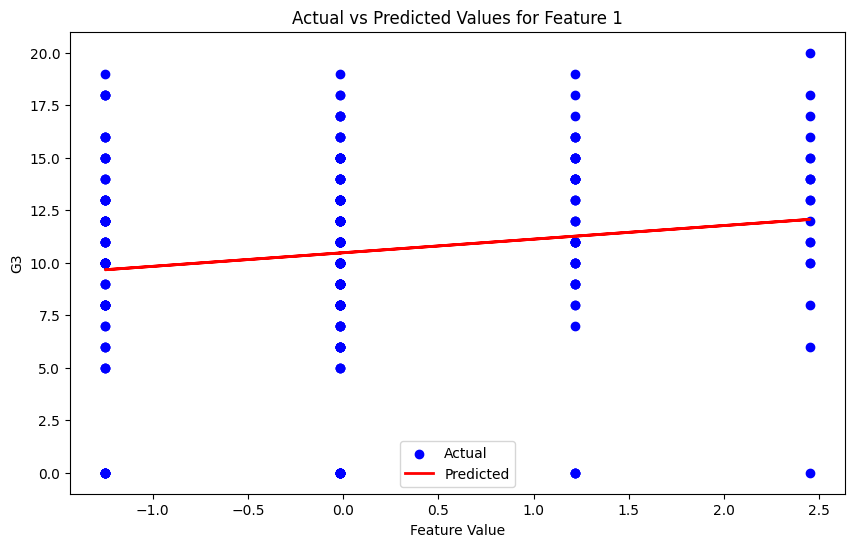

Feature 2:
Mean Squared Error: 19.24657997258
R^2 Score: 0.0004730144321349883



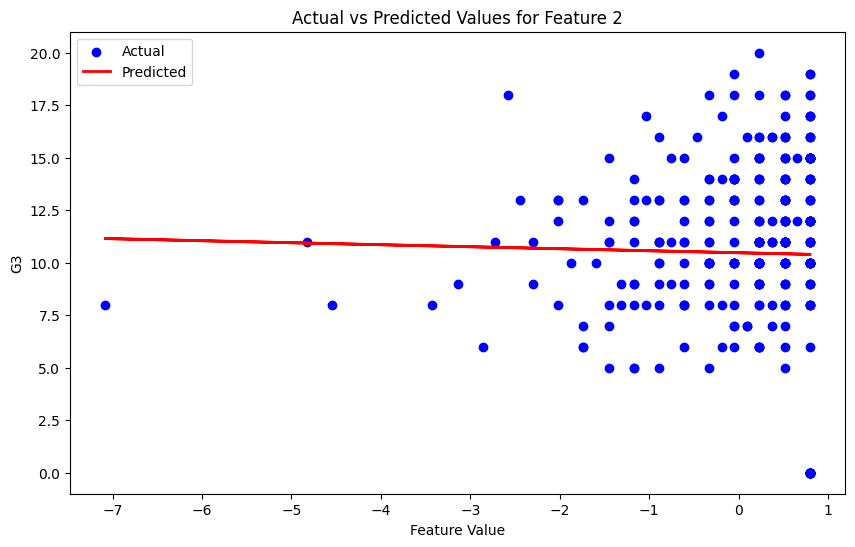

Feature 3:
Mean Squared Error: 7.295488434597281
R^2 Score: 0.6211255415940402



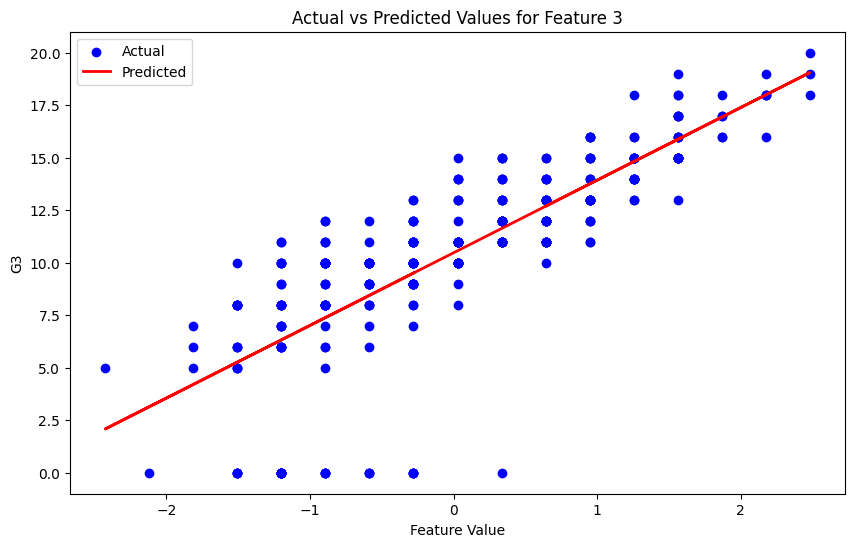

Feature 4:
Mean Squared Error: 3.3493989927704386
R^2 Score: 0.8260566457273237



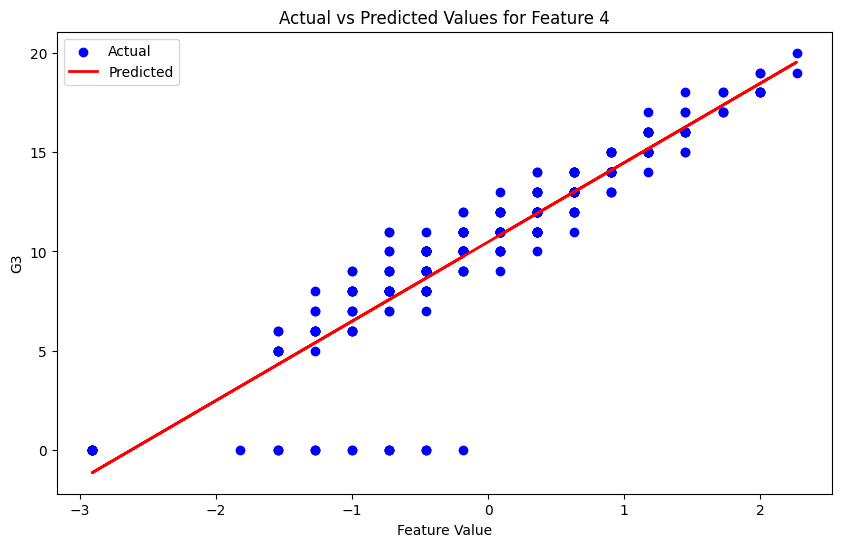

Feature 5:
Mean Squared Error: 19.232232222148582
R^2 Score: 0.001218131941782219



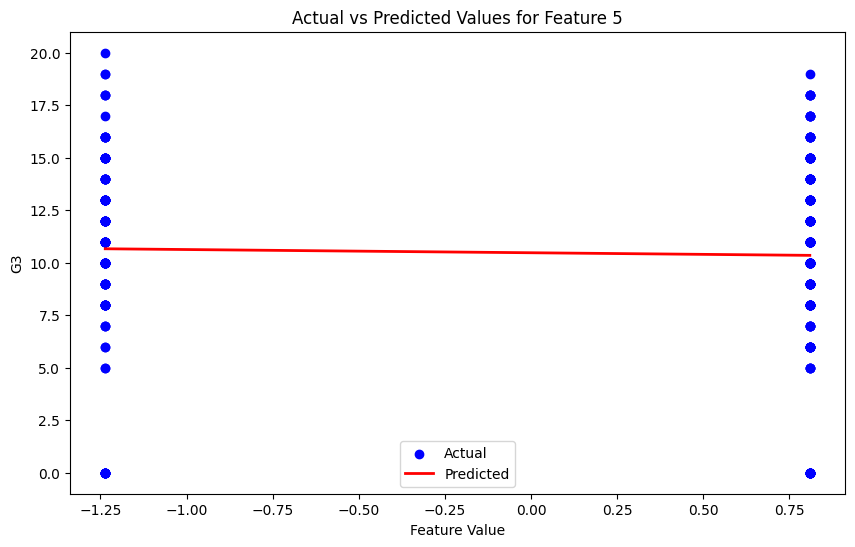

In [25]:
results_80 = {}

for i, feature in enumerate(x_train_80.T):

    feature_reshaped = feature.reshape(-1, 1)

    lr_80.fit(feature_reshaped, y_train_80)

    y_pred = lr_80.predict(feature_reshaped)
    
    mse = mean_squared_error(y_train_80, y_pred)
    r2 = r2_score(y_train_80, y_pred)
    
    results_80[i] = {'mse': mse, 'r2': r2, 'y_pred': y_pred}

for i, (index, metrics) in enumerate(results_80.items()):
    feature = x_train_80[:, index]  
    y_pred = metrics['y_pred']
    
    print(f"Feature {i+1}:")
    print(f"Mean Squared Error: {metrics['mse']}")
    print(f"R^2 Score: {metrics['r2']}")
    print()

    plt.figure(figsize=(10, 6))
    plt.scatter(feature, y_train_80, color='blue', label='Actual')
    plt.plot(feature, y_pred, color='red', linewidth=2, label='Predicted')
    plt.xlabel('Feature Value')
    plt.ylabel('G3')
    plt.title(f'Actual vs Predicted Values for Feature {i+1}')
    plt.legend()
    plt.show()

Feature 1:
Mean Squared Error: 17.030466022716457
R^2 Score: 0.032164541786722456



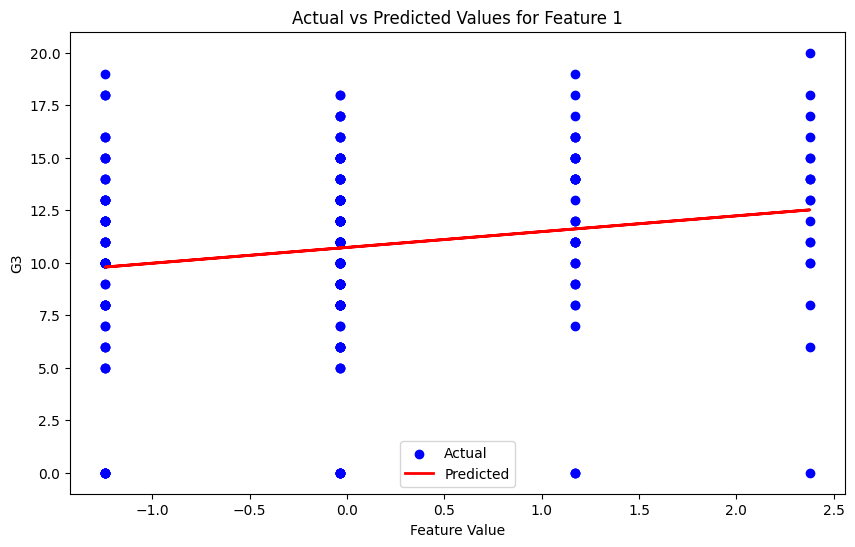

Feature 2:
Mean Squared Error: 17.58433040457273
R^2 Score: 0.000688621686423696



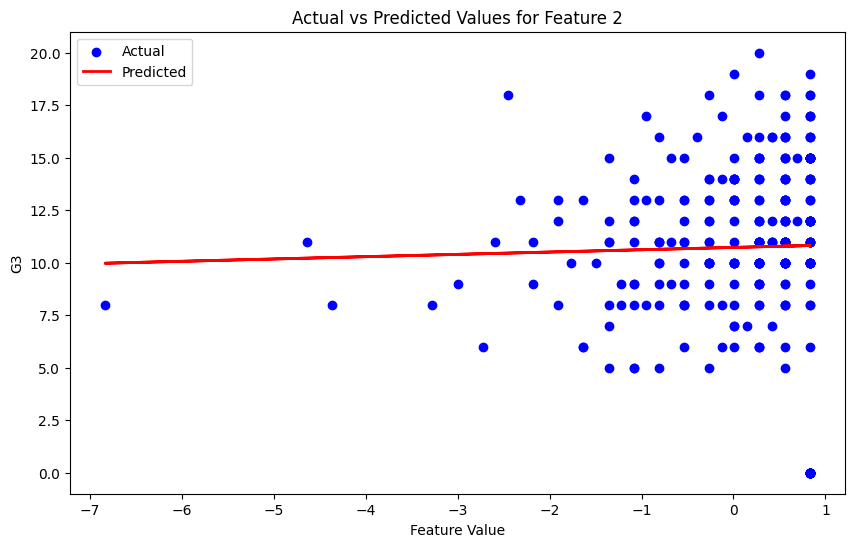

Feature 3:
Mean Squared Error: 6.58093687921991
R^2 Score: 0.6260076470322846



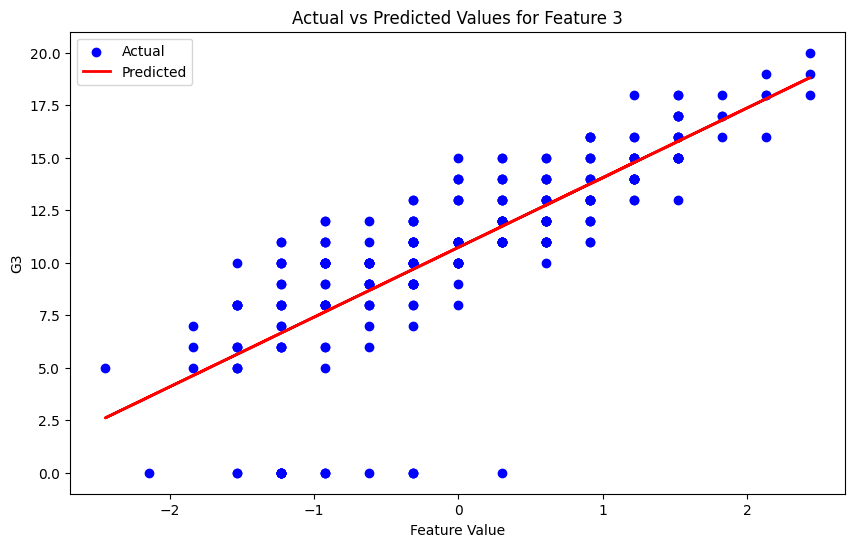

Feature 4:
Mean Squared Error: 2.8245220634830748
R^2 Score: 0.8394833939424626



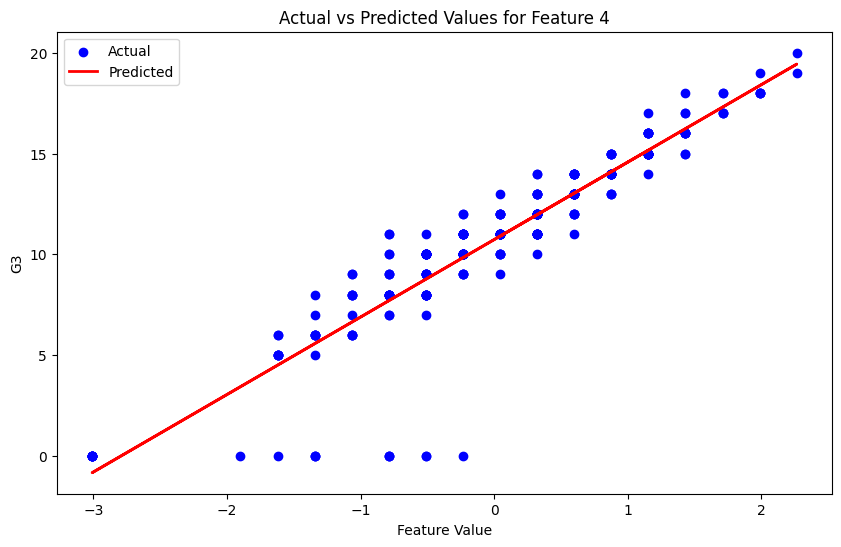

Feature 5:
Mean Squared Error: 17.586992186592102
R^2 Score: 0.0005373535404464835



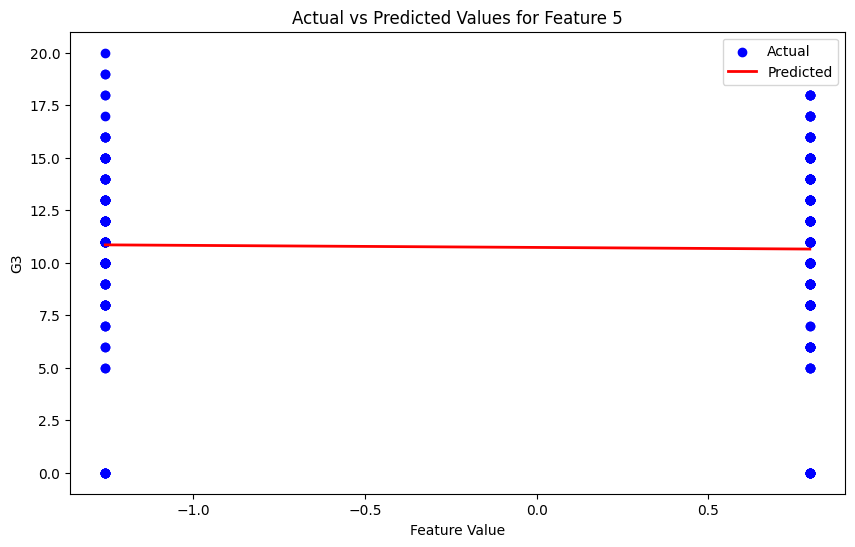

In [26]:
results_70 = {}

for i, feature in enumerate(x_train_70.T):

    feature_reshaped = feature.reshape(-1, 1)
   
    lr_70.fit(feature_reshaped, y_train_70)
    
    y_pred = lr_70.predict(feature_reshaped)
    
    mse = mean_squared_error(y_train_70, y_pred)
    r2 = r2_score(y_train_70, y_pred)
    
    results_70[i] = {'mse': mse, 'r2': r2, 'y_pred': y_pred}

for i, (index, metrics) in enumerate(results_70.items()):
    feature = x_train_70[:, index]
    y_pred = metrics['y_pred']
    
    print(f"Feature {i+1}:")
    print(f"Mean Squared Error: {metrics['mse']}")
    print(f"R^2 Score: {metrics['r2']}")
    print()

    plt.figure(figsize=(10, 6))
    plt.scatter(feature, y_train_70, color='blue', label='Actual')
    plt.plot(feature, y_pred, color='red', linewidth=2, label='Predicted')
    plt.xlabel('Feature Value')
    plt.ylabel('G3')
    plt.title(f'Actual vs Predicted Values for Feature {i+1}')
    plt.legend()
    plt.show()

Feature 1:
Mean Squared Error: 17.70736345222825
R^2 Score: 0.01992954706876182



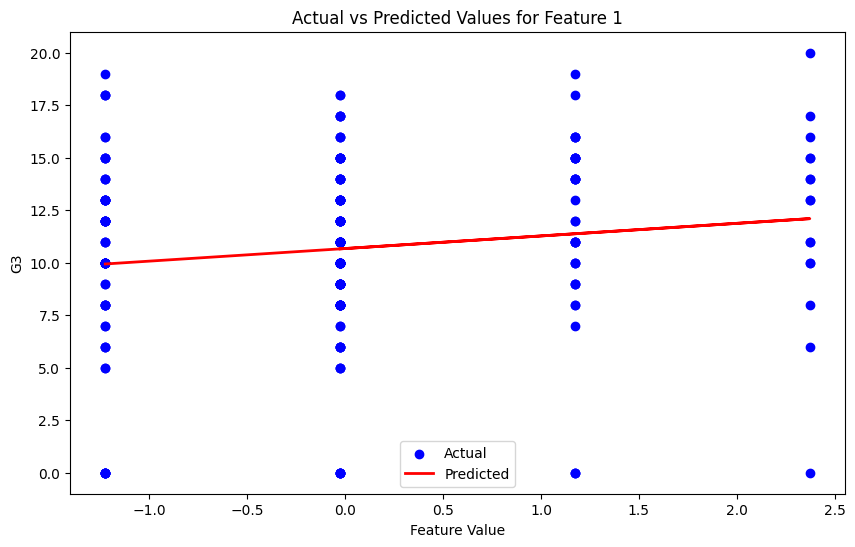

Feature 2:
Mean Squared Error: 18.058661003944337
R^2 Score: 0.00048586469600875315



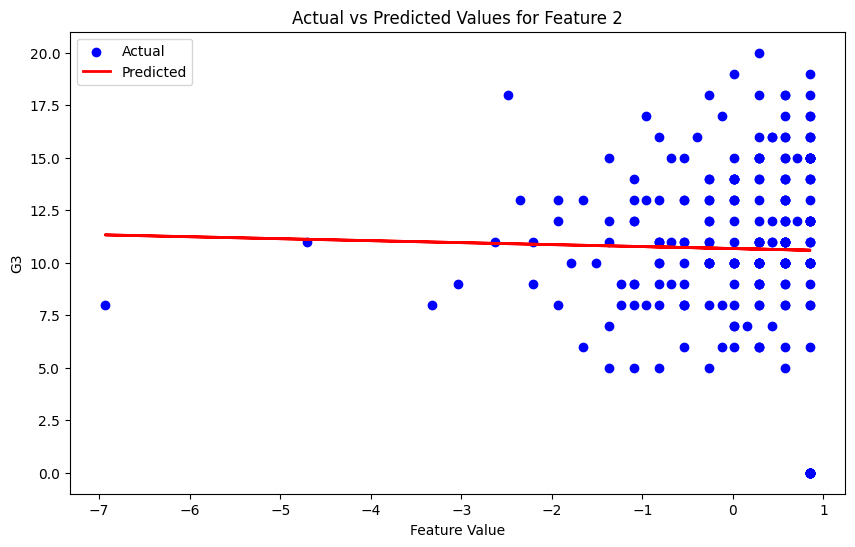

Feature 3:
Mean Squared Error: 6.431145114719035
R^2 Score: 0.6440477814524074



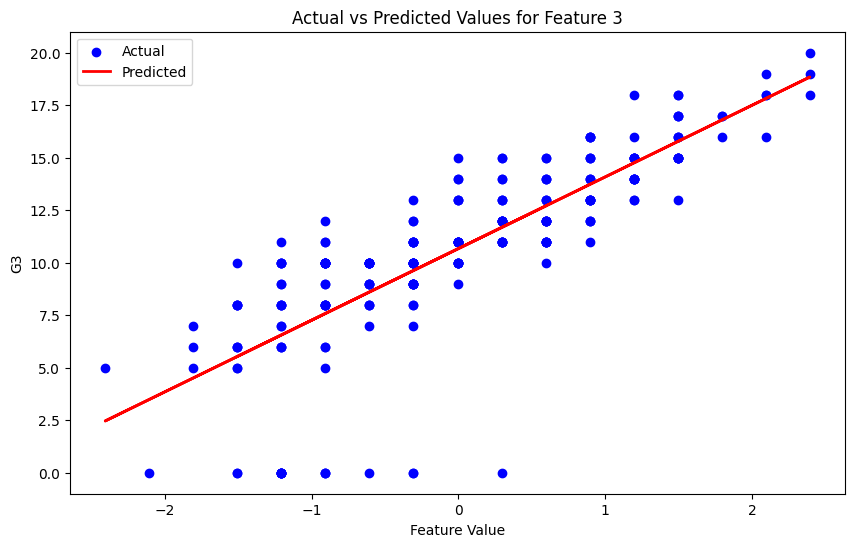

Feature 4:
Mean Squared Error: 3.1530231663108093
R^2 Score: 0.8254858860809083



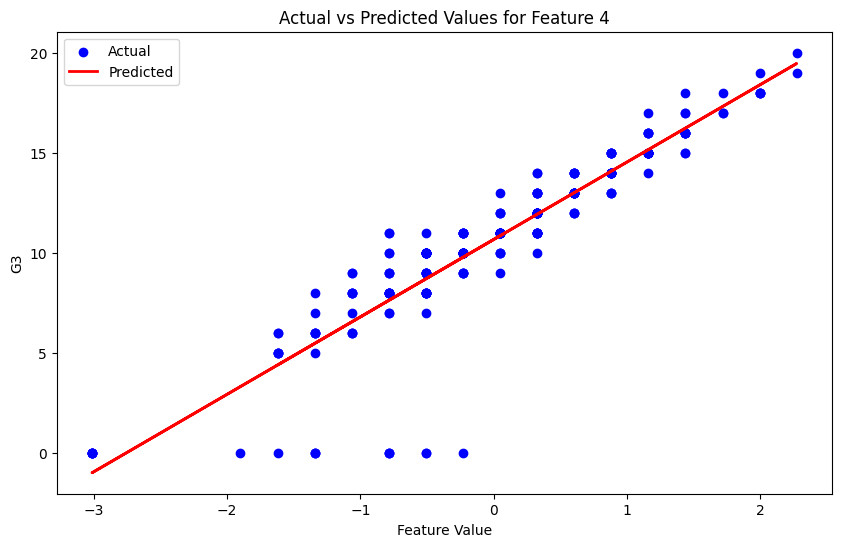

Feature 5:
Mean Squared Error: 17.977512574703486
R^2 Score: 0.004977283083353878



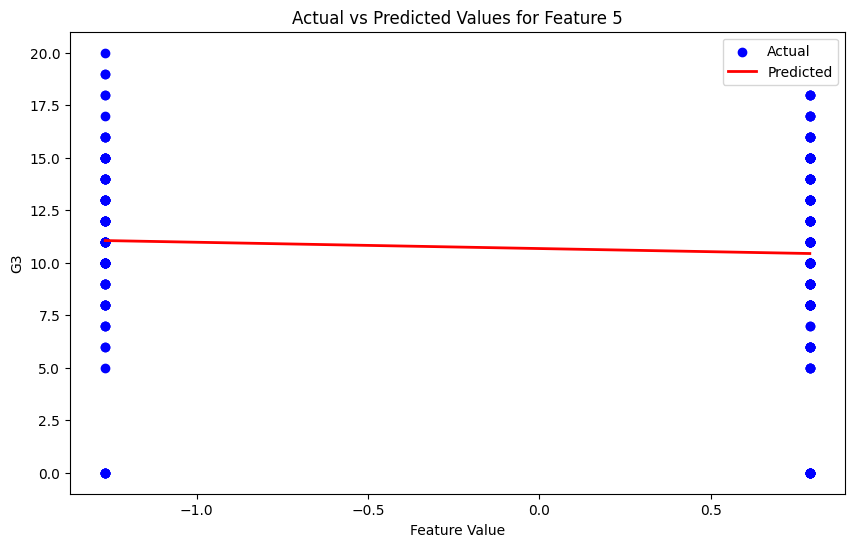

In [27]:
results_60 = {}


for i, feature in enumerate(x_train_60.T):
    
    feature_reshaped = feature.reshape(-1, 1)
    
    lr_60.fit(feature_reshaped, y_train_60)
    
    
    y_pred = lr_60.predict(feature_reshaped)
    
    
    mse = mean_squared_error(y_train_60, y_pred)
    r2 = r2_score(y_train_60, y_pred)
    
    
    results_60[i] = {'mse': mse, 'r2': r2, 'y_pred': y_pred}


for i, (index, metrics) in enumerate(results_60.items()):
    feature = x_train_60[:, index] 
    y_pred = metrics['y_pred'] 
    
    print(f"Feature {i+1}:")
    print(f"Mean Squared Error: {metrics['mse']}")
    print(f"R^2 Score: {metrics['r2']}")
    print()

    
    plt.figure(figsize=(10, 6))
    plt.scatter(feature, y_train_60, color='blue', label='Actual')
    plt.plot(feature, y_pred, color='red', linewidth=2, label='Predicted')
    plt.xlabel('Feature Value')
    plt.ylabel('G3')
    plt.title(f'Actual vs Predicted Values for Feature {i+1}')
    plt.legend()
    plt.show()

### COMPARISON

In [31]:
comparison_df_80 = pd.DataFrame({
    'Actual': y_test_20,
    'Linear Regression': y_pred_lr_80,
    'KNN': y_pred_80
})

comparison_df_70 = pd.DataFrame({
    'Actual': y_test_30,
    'Linear Regression': y_pred_lr_70,
    'KNN': y_pred_70
})

comparison_df_60 = pd.DataFrame({
    'Actual': y_test_40,
    'Linear Regression': y_pred_lr_60,
    'KNN': y_pred_60
})

# Display the comparison tables
print("80/20 Split Comparison:")
print(comparison_df_80)

print("\n70/30 Split Comparison:")
print(comparison_df_70)

print("\n60/40 Split Comparison:")
print(comparison_df_60)

80/20 Split Comparison:
     Actual  Linear Regression  KNN
329      14          14.111782   14
318      10          10.576978    9
317       9           9.742454   10
65       15          15.290579   16
59       16          16.203073   15
..      ...                ...  ...
276       9          11.602135    8
140       0           8.087025   10
142      11          10.455637    9
306      18          18.269790   15
146       0           6.031962    0

[79 rows x 3 columns]

70/30 Split Comparison:
     Actual  Linear Regression  KNN
329      14          14.150771   14
318      10          10.731640   10
317       9           9.827970   10
65       15          15.305605   15
59       16          16.212710   13
..      ...                ...  ...
221       0           4.244575    0
218       8           6.493615    6
355       9           8.659529   10
134       0          -0.453900    0
175       9           8.617948   10

[119 rows x 3 columns]

60/40 Split Comparison:
     Actual  Li

### CONCLUSSION

```markdown
#### Key Findings:
1. **Optimal K Values for KNN**:
    - For the 80/20 split, the optimal K value was `optimal_k_80`. value = 7
    - For the 70/30 split, the optimal K value was `optimal_k_70`. value = 18
    - For the 60/40 split, the optimal K value was `optimal_k_60`. value = 5
    - The optimal K values are identified using the cross-validation. The optimal k values for each split have a crucial role in maximizing the model performance. Even finding the k value, the model is not performing well in terms of scores and the model is underfitting.This suggests that KNN may not be the most appropriate model for this dataset.
    
2. **Model Performance**:
    - **KNN**:
      - **Scores**
        - 80/20 split
        Accuracy:   0.25316455696202533
        Precision:  0.3508870214752568
        Recall:     0.22844410491469314
        F1:         0.16927386339151046

        - 70/30 split
        
        Accuracy:   0.3025210084033613
        Precision:  0.528577091513138
        Recall:     0.20799655388471178
        F1:         0.18742545528654592

        - 60/40 split
        Accuracy:   0.34177215189873417
        Precision:  0.48763492956991406
        Recall:     0.23690457946513307
        F1:         0.23561067916279466
      
      - The KNN model is not comaptible with the data.
      - The model is underfitting and the model is not performing well and it is struggling capturing patterns within the dataset.
      - The model cannot able to predict the student performance accurately.
      - Decision boundaries and scatter plots provide a visual representation to understand the model performance.

    - **Linear Regression**:
      - The Linear Regression model was trained and evaluated on each train-test split. The predictions were compared with the actual values to assess the model's accuracy.
      - The Mean Squared Error (MSE) and R² scores for each feature were calculated to evaluate the model's performance.

3. **Comparison of Models**:
    - The comparison tables for each split (80/20, 70/30, and 60/40) showed the actual values, KNN predictions, and Linear Regression predictions.
    - Both models had their strengths and weaknesses, with KNN generally performing better in terms of classification accuracy, while Linear Regression provided a straightforward approach to predicting continuous values.

    Overall, the KNN model showed robust performance in classifying student performance, especially at the optimal K values ​​determined through cross-validation. The Linear Regression model, was simple but also provided important insights into the relationships between features and the target variable. But they are not and their scores are low which indicates that the dataset is not in order or there is another issue that must be tackled and fixed.```